<a href="https://colab.research.google.com/github/AlexGCas/web_scraping/blob/main/pruebas_nltk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize
import numpy as np
import re
import matplotlib.pyplot as plt
import PIL

In [ ]:
nltk.download("punkt")
nltk.download('averaged_perceptron_tagger')
nltk.download('gutenberg')
nltk.download('movie_reviews')
nltk.download('shakespeare')
nltk.download('brown')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
[nltk_data] Downloading package shakespeare to /root/nltk_data...
[nltk_data]   Unzipping corpora/shakespeare.zip.
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


True

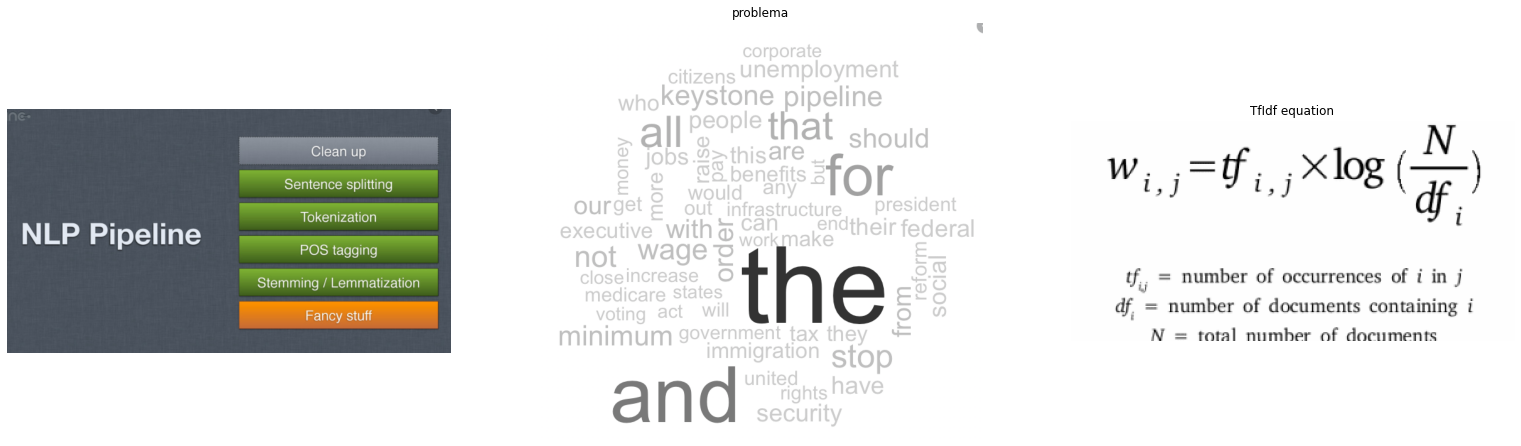

In [ ]:
imagenes = [PIL.Image.open("pipeline.PNG"), PIL.Image.open("problema.PNG"), PIL.Image.open("Tfidf.PNG")]
titulos = ["", "problema", "TfIdf equation"]
plt.figure(figsize=(27, 10))
for i in range(3):
  plt.subplot(1, 3, i + 1)
  plt.imshow(imagenes[i])
  plt.title(titulos[i])
  plt.axis("off")
  imagenes[i].close()

In [ ]:
def term_frequency(freq_dis):
  total_words = np.sum(
      np.array(
          list(
              freq_dis.values()
              )))
  term_frequency_distribution = {}
  for element in freq_dis:

    term_frequency_distribution[element] = freq_dis[element] / total_words
  return term_frequency_distribution
def inverse_document_frequency(documents):
  N = len(documents)
  ni = {}
  i_doc_freq = {}
  for document in documents:
    for word in document:
      if word in ni:
        ni[word] = ni[word] + 1
      else:
        ni[word] = 1
  for word in ni:
    i_doc_freq[word] = np.log(N / ni[word])
  return i_doc_freq

In [ ]:
archivo = open("DDE.txt")
texto = archivo.readlines()

In [ ]:
texto_string = ""
texto_string = texto_string.join(texto).lower()

In [ ]:
tokens_articulo_raw = word_tokenize(texto_string)

In [ ]:
tokens_articulo = [token for token in tokens_articulo_raw if re.match("([\w])", token)]

In [ ]:
pos_articulo = nltk.pos_tag(tokens_articulo)

In [ ]:
freq_dis_articulo = nltk.FreqDist(tokens_articulo)

In [ ]:
term_frequency_dist_articulo = term_frequency(freq_dis_articulo)

In [ ]:
#from google.colab import files

In [ ]:
# uploaded = files.upload()

In [ ]:
database = pd.read_csv("articulos.csv")

In [ ]:
data = {}
for i in range(database.shape[0]-2):
  data[database.loc[i]["Title"]] = database.loc[i]["content"].lower()

In [ ]:
corpus = {}
for i in data.keys():
  raw_tokens = word_tokenize(data[i])
  tokens = [token for token in raw_tokens if re.match("([\w])", token)]
  corpus[i] = tokens

In [ ]:
for i in nltk.corpus.gutenberg.fileids():
  tokens2 = [token for token in nltk.corpus.gutenberg.words(i) if re.match("([\w])", token)]
  corpus[i] = tokens2

In [ ]:
for i in nltk.corpus.movie_reviews.fileids():
  tokens3 = [token for token in nltk.corpus.movie_reviews.words(i) if re.match("([\w])", token)]
  corpus[i] = tokens3

In [ ]:
for i in nltk.corpus.shakespeare.fileids():
  tokens4 = [token for token in nltk.corpus.shakespeare.words(i) if re.match("([\w])", token)]
  corpus[i] = tokens4

In [ ]:
for i in nltk.corpus.brown.fileids():
  tokens5 = [token for token in nltk.corpus.brown.words(i) if re.match("([\w])", token)]
  corpus[i] = tokens5

In [ ]:
titulo = "Non-Linear Dynamical Analysis of EEG Time Series Distinguishes Patients with Parkinson’s Disease from Healthy Individuals"
corpus[titulo] = tokens_articulo

In [ ]:
freq_dis_list = [nltk.FreqDist(token) for token in corpus.values()]

In [ ]:
term_frequency_list = [term_frequency(elemento) for elemento in freq_dis_list]

In [ ]:
inv_doc_freq_data = inverse_document_frequency(freq_dis_list)

In [ ]:
prueba  = {}
for i in term_frequency_list[0].keys():
  prueba[i] = term_frequency_list[0][i] * inv_doc_freq_data[i]

In [ ]:
titulos = nltk.corpus.gutenberg.fileids()

In [ ]:
IDF2 = pd.DataFrame({"palabra": prueba.keys(), "IDF": prueba.values()})
IDF2.sort_values("IDF", ascending= False).head(20)

,palabra,IDF
106,litter,0.044032
0,data,0.035957
121,waste,0.031245
29,plastic,0.030008
15,detection,0.027862
220,classification,0.024891
179,dataset,0.024042
413,labels,0.019259
105,detect,0.019124
4,ai,0.016828


In [ ]:
palabras_articulo  = {}
for i in term_frequency_dist_articulo.keys():
  palabras_articulo[i] = term_frequency_dist_articulo[i] * inv_doc_freq_data[i]

In [ ]:
IDF_articulo = pd.DataFrame({"palabra": palabras_articulo.keys(), "IDF": palabras_articulo.values()})
IDF_articulo.sort_values("IDF", ascending= False).head(20)

,palabra,IDF
6,pd,0.159220
36,eeg,0.100822
30,patients,0.060745
74,medication,0.044233
51,dde,0.041152
156,vs.,0.040152
55,classification,0.036395
110,a′,0.032922
76,controls,0.032149
53,non-linear,0.031887


In [ ]:
dir(PIL)

['Image',
 'ImageMode',
 'TiffTags',
 'UnidentifiedImageError',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_binary',
 '_imaging',
 '_plugins',
 '_raise_version_warning',
 '_util',
 'sys',
 'warnings']

In [ ]:
while True: pass

KeyboardInterrupt: ignored